# Demonstrating plot functions useful for Bayesian analyses

This notebook demonstrates the use of the functions
`smooth_histogram`, `density_contour`, and `density_contour_joint`
in the package `flavio.plots`.
These functions are particularly useful for Bayesian analyses using Markov chains where the marginal posterior distributions are obtained from high-dimensional posterior samples.

## Preliminaries: imports

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import flavio
import flavio.plots
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
flavio.__version__, matplotlib.__version__

('0.20', '2.0.0')

## Generating random data

Here we draw 1 million tuples from a bivariate normal distribution with unit variance and 50% correlation.

In [2]:
r = np.random.multivariate_normal(mean=[0,0], cov=[[1,0.5], [0.5,1]], size=1000000)

In [3]:
x, y = r.T

## 1D smooth histograms

Plotting a simple 1D histogram with a Gaussian kernel density estimator is as simple as calling `smooth_histogram(x)`. The shading corresponds to 68% probability.

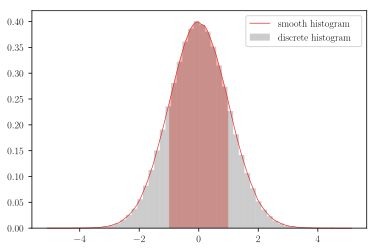

In [4]:
flavio.plots.smooth_histogram(x, label='smooth histogram')

plt.hist(x, normed=True, bins=50, alpha=0.2, color='k', label='discrete histogram');
plt.legend()

If the number of points is smaller - taking a mere 50 points for example - the result depends on the kernel bandwith used. The automatic choice leads to a nice Gaussian, while reducing the bandwidth follows more and more the discrete nature of the distribution.

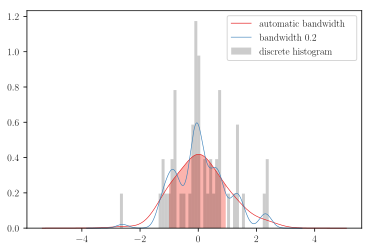

In [5]:
flavio.plots.smooth_histogram(x[:50], label='automatic bandwidth')
flavio.plots.smooth_histogram(x[:50], bandwidth=0.2, fill=False, col=1, label='bandwidth 0.2')

plt.hist(x[:50], normed=True, bins=50, alpha=0.2, color='k', label='discrete histogram');
plt.legend()

## 2D density contours

The `density_contour` function is useful for 2D distributions. By default, it shows 1 and 2$\sigma$ (68.3 and 95.5% probability) contours.

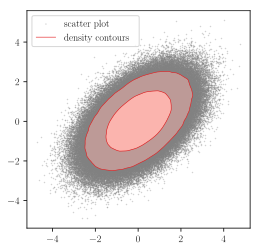

In [6]:
plt.figure(figsize=(4,4))
plt.scatter(x, y, label='scatter plot', rasterized=True, s=0.2, c='0.5', alpha=0.4)

flavio.plots.density_contour(x, y, label='density contours')

plt.legend()

The number of contours can also be increased, but it depends on the statistics whether they are meaningful, as seen in this example for the $4\sigma$ contour.

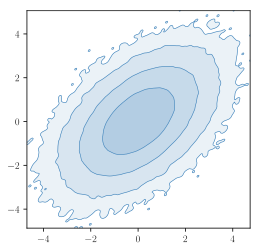

In [7]:
plt.figure(figsize=(4,4))
flavio.plots.density_contour(x, y, n_sigma=(1,2,3,4), col=1)

For low statistics - taking 500 points here for example - the `covariance_factor` can be used to tweak the smoothing kernel bandwidth

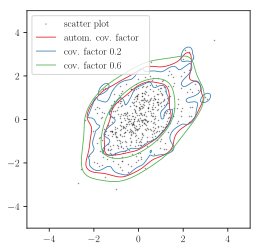

In [8]:
plt.figure(figsize=(4,4))
plt.scatter(x[:500], y[:500], label='scatter plot', rasterized=True, s=0.2, c='k', alpha=0.5)

flavio.plots.density_contour(x[:500], y[:500], filled=False, col=0, label='autom. cov. factor')
flavio.plots.density_contour(x[:500], y[:500], filled=False, col=1, covariance_factor=0.2, label='cov. factor 0.2')
flavio.plots.density_contour(x[:500], y[:500], filled=False, col=2, covariance_factor=0.6, label='cov. factor 0.6')

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.legend()

## Joint 2D and 1D probability plots

The function `density_contour_joint` allows to combined the 1D and 2D plot functions. See the [API docs](https://flav-io.github.io/apidoc/flavio/plots/plotfunctions.m.html#flavio.plots.plotfunctions.density_contour_joint) for details on the options.

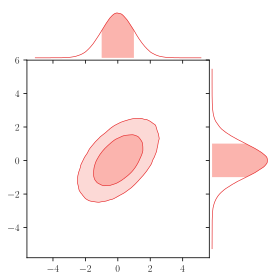

In [9]:
plt.figure(figsize=(4,4))
flavio.plots.density_contour_joint(x, y);

It is also simple to combine several distributions in a single joint plot. Just feed the output of the first call
as keyword arguments to the second call:

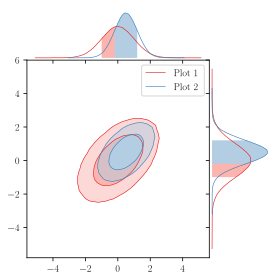

In [10]:
plt.figure(figsize=(4,4))
axes = flavio.plots.density_contour_joint(x, y, col=0, label='Plot 1');
flavio.plots.density_contour_joint(0.7*x+0.5, 0.7*y+0.5, col=1, label='Plot 2', **axes);
plt.legend()